In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### Steps in Regression
- Dataset creation and train & test splitting
- Guess a line
- Measure how wrong is the line
- See how wrong it is.
- Correct it slightly
- Rinse and Repeat


## Making regression dataset
- Making Dataset for simple linear regression
- sample size 250. 1 Feature to train on


In [2]:
# linear regression dataset
X, y = make_regression(
    n_samples=250,
    n_features=1,
    noise=25,
    bias=5,
    random_state=14,
)
X.shape, y.shape

((250, 1), (250,))

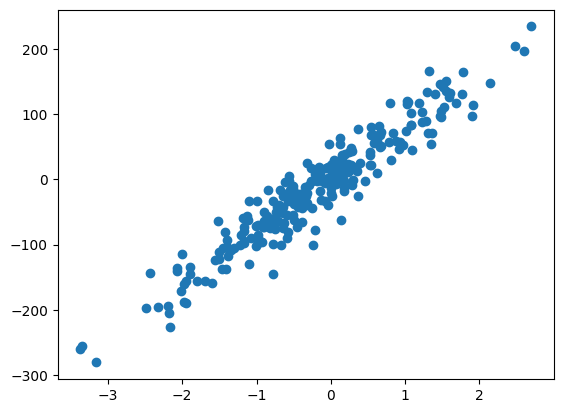

In [3]:
plt.scatter(X, y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=14,
    train_size=0.20,
)

### Using Covariance and Variance

- Calculate Covariance
- Calculate Variance


### Covariance

Indicates the direction of the linear relationship between X and Y. Positive covariance means they move together; negative means opposite.

$$
Cov(x, y) = \frac{\sum(x_{i} - \overline{x})(y_{i} - \overline{y})}{n -1}
$$

-   $x_{i}$ x at i
-   $\overline{x}$ mean of x
-   $y_{i}$ x at i
-   $\overline{y}$ mean of x


--------

$$\^{\beta }=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$$

-------

### Guess Line
- Initialize random weights
- predict

In [ ]:
def init():
    m = np.random.rand()
    c = np.random.rand()
    return m, c

In [ ]:
def predict_raw(X, m, c):
    y_pred = []
    for x in X:
        y_hat = (x * m) + c
        y_pred.append(y_hat)

    return np.array(y_pred)

In [30]:
def predict(X, m, c):
    y_pred = np.dot(X, m) + c
    return y_pred

### Calculate Root Mean Square Error
- Calculate squared error for each prediction
- mean and then square root

In [ ]:
def root_mean_squared_error_raw(y_pred, y):
    residuals = []
    for y_hat, y_og in zip(y_pred, y):
        residual = y_hat - y_og
        residuals.append(residual)

    mean = sum(residuals) / len(residuals)
    return mean ** (1 / 2)

In [ ]:
def root_mean_squared_error(y_pred, y):
    residual = (y_pred - y) ** 2
    mean = np.mean(residual)
    return np.sqrt(mean)

### Error Correction
- perform gradient decent
- 

### Runner Code
- 